<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных-о-товарах-категории-&quot;Movie&quot;-компании-Best-Buy" data-toc-modified-id="Анализ-данных-о-товарах-категории-&quot;Movie&quot;-компании-Best-Buy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных о товарах категории "Movie" компании Best Buy</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Предобработка-и-преобразование-данных" data-toc-modified-id="Предобработка-и-преобразование-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка и преобразование данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Базовый-анализ-данных" data-toc-modified-id="Базовый-анализ-данных-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Базовый анализ данных</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# Анализ данных о товарах категории "Movie" компании Best Buy

Best Bue - американская компания, владеющая крупной сетью магазинов бытовой электроники и сопутствующих товаров.

В данном отчете представлены данные о товарах категории "Movie":
- с оценками пользователей не ниже 4 баллов;
- с количеством отзывов пользователей не менее 10;
- которые имеются в наличии;
- попадают в раздел "Best Sell"

Выгрузке подлежали данные о 1 949 продуктах, размещенные на 20 страницах.

## Получение данных

In [1]:
import requests
import json 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#функция для получения датафрейма из запроса
def get_dataframe(link):
    response = requests.get(link).text
    python_dict = json.loads(response)
    products_list = python_dict['products'] #получаем только список товаров с характеристиками из всего словаря
    data = pd.DataFrame.from_dict(products_list)
    return data

In [3]:
#ссылка на первую страницу данных
url = 'https://api.bestbuy.com/v1/products(categoryPath.id=cat02015&customerReviewAverage>=4&type=Movie&categoryPath.id=cat00000&customerReviewCount>10&inStoreAvailability=true)?apiKey=qhqws47nyvgze2mq3qx4jadt&sort=customerReviewCount.dsc&show=customerReviewCount,salePrice,name,sku&format=json&pageSize=100&page=1'

data_frst_page = get_dataframe(url)
data_frst_page

,customerReviewCount,salePrice,name,sku
0,20741,22.99,Star Wars: The Force Awakens [Includes Digital...,6395175
1,16965,17.99,Rogue One: A Star Wars Story [Includes Digital...,6395168
2,16002,22.99,Avengers: Infinity War [Includes Digital Copy]...,6234448
3,15483,13.99,Deadpool [Includes Digital Copy] [4K Ultra HD ...,5048201
4,15360,22.99,Avengers: Endgame [Includes Digital Copy] [4K ...,6344511
...,...,...,...,...
95,3209,17.99,Ralph Breaks the Internet [SteelBook] [Dig Cop...,6314976
96,3170,13.99,Aladdin [Signature Collection] [Includes Digit...,6360039
97,3154,8.99,13 Hours: The Secret Soldiers of Benghazi [Ste...,6193991
98,3154,21.99,13 Hours: The Secret Soldiers of Benghazi [Inc...,6344847


In [4]:
#функция для получения всех страниц запроса после первой
def get_all_pages(link_part):
    data_full = data_frst_page
    for i in list(range(2,21)): #количество страниц с данными - 20
        used_url = link_part + str(i)
        data_next_page = get_dataframe(used_url)
        data_full = pd.concat([data_full, data_next_page], ignore_index=True)
    return data_full

In [5]:
#часть ссылки без указания номера страницы данных
url_part = 'https://api.bestbuy.com/v1/products(categoryPath.id=cat02015&customerReviewAverage>=4&type=Movie&categoryPath.id=cat00000&customerReviewCount>10&inStoreAvailability=true)?apiKey=qhqws47nyvgze2mq3qx4jadt&sort=customerReviewCount.dsc&show=customerReviewCount,salePrice,name,sku&format=json&pageSize=100&page='

movie_data = get_all_pages(url_part) #рабочий датафрейм с данными о товарах в категории "фильмы"

In [6]:
movie_data

,customerReviewCount,salePrice,name,sku
0,20741,22.99,Star Wars: The Force Awakens [Includes Digital...,6395175
1,16965,17.99,Rogue One: A Star Wars Story [Includes Digital...,6395168
2,16002,22.99,Avengers: Infinity War [Includes Digital Copy]...,6234448
3,15483,13.99,Deadpool [Includes Digital Copy] [4K Ultra HD ...,5048201
4,15360,22.99,Avengers: Endgame [Includes Digital Copy] [4K ...,6344511
...,...,...,...,...
1960,11,34.99,The God of High School: The Complete Season [B...,6499329
1961,11,13.99,Studio 666 [Includes Digital Copy] [Blu-ray/DV...,6515784
1962,11,22.99,Aqua Teen Forever: Plantasm [Includes Digital ...,6519858
1963,11,21.99,Ghosts: Season One [Includes Digital Copy] [Bl...,6521313


## Предобработка и преобразование данных

Полученная таблица содержит данные о количестве оценок пользователей, цене, имени и sku (идентификатор товарной позиции). Столбец "name", помимо названия, содержит информацию о типе носителя, на котором продается фильм, и годах выхода фильма. Далее, для удобства работы с таблицей, будут совершены преобразования по вычленению указанных данных в отдельные столбцы.

In [7]:
#получение названия фильма
movie_data['new_name'] = [re.sub(r'\[[^\]]+\]', '', x) for x in movie_data['name']]

In [8]:
type_list = ['Blu-ray/DVD', 'Blu-ray', 'DVD']
#функция для получения типа носителя
def get_type(row):
    for e in row.split('['):
        for i in type_list:
            if i in e:
                return i
            
movie_data['type'] = movie_data['name'].apply(get_type)
movie_data['type'] = movie_data['type'].str.strip()

In [9]:
#получение года фильма
movie_data['year'] = [re.findall(r'\d{4}', x) for x in movie_data['name']]
movie_data['year'] = [''.join(x) for x in movie_data['year']]
movie_data['year'].sort_values().unique()

array(['', '1883', '19172019', '1937', '1938', '1939', '1941', '1942',
       '1945', '1946', '1947', '1949', '1950', '1951', '1952', '1953',
       '1954', '19541975', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '19842020', '1985', '1986', '1987', '1988', '1989', '19891997',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '20162016', '2017', '20171994', '2018',
       '2019', '2020', '2021', '2022', '20492017', '30002001', '9021'],
      dtype=object)

In [10]:
#функция для получения более корректных данных о годах, 
#    так как в датафрейм попали пустые строки и некорректные значения
def get_year(row):
    for elem in row:
        if len(row) == 4:
            return row
        if len(row) == 0:
            return np.nan
        else:
            return row[-4:]
        
movie_data['year'] = movie_data['year'].apply(get_year)
movie_data['year'] = movie_data['year'].astype('float')
movie_data = movie_data.query('year != 9021') #убираем оставшееся некорректное значение

In [11]:
movie_data = movie_data.drop(columns = ['name'],axis = 1)
movie_data.columns = ['customer_review_count', 'price', 'sku', 'name', 'type', 'year']

На этапе преобразования данных было выполнено:
- создание новых столбцов с информацией о названии, типе носителя и годах выхода фильмов;
- переименование столбцов и удаление лишних.

In [12]:
movie_data

,customer_review_count,price,sku,name,type,year
0,20741,22.99,6395175,Star Wars: The Force Awakens,Blu-ray,2015.0
1,16965,17.99,6395168,Rogue One: A Star Wars Story,Blu-ray,2016.0
2,16002,22.99,6234448,Avengers: Infinity War,Blu-ray,2018.0
3,15483,13.99,5048201,Deadpool,Blu-ray,2016.0
4,15360,22.99,6344511,Avengers: Endgame,Blu-ray,2019.0
...,...,...,...,...,...,...
1960,11,34.99,6499329,The God of High School: The Complete Season,Blu-ray,NaN
1961,11,13.99,6515784,Studio 666,Blu-ray/DVD,2022.0
1962,11,22.99,6519858,Aqua Teen Forever: Plantasm,Blu-ray,NaN
1963,11,21.99,6521313,Ghosts: Season One,Blu-ray,NaN


## Анализ данных

### Обзор данных

In [13]:
#функция для первичного обзора данных
def data_review(data):
    data.info()
    display(data.head(5))
    print('Количество строк-дубликатов:', data.duplicated().sum())
    for i in list(data.columns):
        if (data[i].dtypes == 'float64' or data[i].dtypes == 'int64') and i != 'sku':
            display(data[i].describe())
        if data[i].dtypes == 'object':
            display(data[i].value_counts())   

data_review(movie_data)            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1964
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_review_count  1964 non-null   int64  
 1   price                  1964 non-null   float64
 2   sku                    1964 non-null   int64  
 3   name                   1964 non-null   object 
 4   type                   1874 non-null   object 
 5   year                   1542 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 107.4+ KB


,customer_review_count,price,sku,name,type,year
0,20741,22.99,6395175,Star Wars: The Force Awakens,Blu-ray,2015.0
1,16965,17.99,6395168,Rogue One: A Star Wars Story,Blu-ray,2016.0
2,16002,22.99,6234448,Avengers: Infinity War,Blu-ray,2018.0
3,15483,13.99,5048201,Deadpool,Blu-ray,2016.0
4,15360,22.99,6344511,Avengers: Endgame,Blu-ray,2019.0


Количество строк-дубликатов: 0


count     1964.000000
mean       688.749491
std       1669.499324
min         11.000000
25%         28.000000
50%         99.000000
75%        527.250000
max      20741.000000
Name: customer_review_count, dtype: float64

count    1964.000000
mean       22.104053
std        16.922292
min         5.990000
25%        13.990000
50%        18.990000
75%        24.990000
max       289.990000
Name: price, dtype: float64

Scream                                 4
Elvis                                  3
Wall-E                                 3
Sonic the Hedgehog                     3
Mulan                                  3
                                      ..
Weathering with you                    1
Weathering with You                    1
Spirit: Stallion of the Cimarron       1
Spirit: Stallion of the Cimarron       1
The Banshees of Inisherin              1
Name: name, Length: 1768, dtype: int64

Blu-ray        1385
DVD             277
Blu-ray/DVD     212
Name: type, dtype: int64

count    1542.000000
mean     2003.817769
std        19.200364
min      1883.000000
25%      1991.000000
50%      2012.000000
75%      2020.000000
max      2022.000000
Name: year, dtype: float64

Получена информация о 1 949 фильмах. Не все позиции имеют информацию о годе выпуска и носителе. Пустые строки и дубликаты не обнаружены. Также, таблица содержит следующие данные:
- Количество рецензий имеет максимум, равный - 20 741. При среднем значении - 676 и стандартном отклонении - 1 656, показатель имеет значительный разброс;
- Цена имеет меньший размах значений. 75% товаров не превышают цены в 24 USD;
- Большинство фильмов представлены на носителе Blu-ray, что обусловлено спецификой американского рынка;
- В сети магазинов представлены фильмы с 1883 по 2022 год выпуска.

### Базовый анализ данных

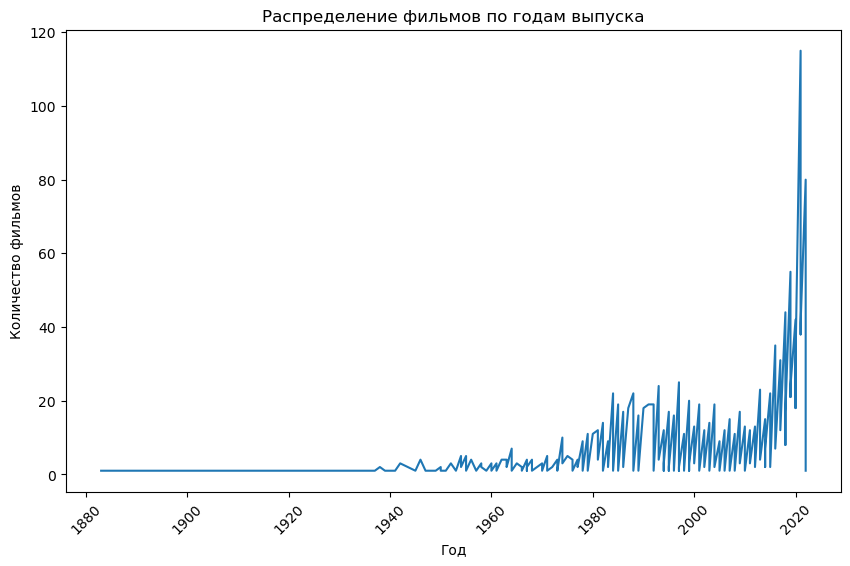

In [14]:
movies_by_year = (
    movie_data.groupby(['year', 'type']).
    agg({'sku':'nunique'}).
    reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(movies_by_year['year'], movies_by_year['sku'])
plt.title('Распределение фильмов по годам выпуска')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

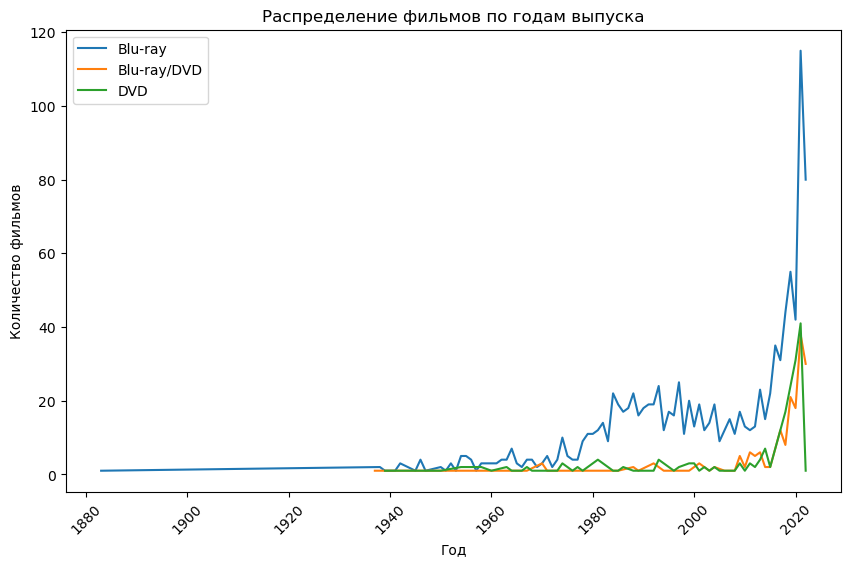

In [15]:
plt.figure(figsize=(10,6))
plt.plot(movies_by_year.query('type == "Blu-ray"')['year'], movies_by_year.query('type == "Blu-ray"')['sku'], label='Blu-ray')
plt.plot(movies_by_year.query('type == "Blu-ray/DVD"')['year'], movies_by_year.query('type == "Blu-ray/DVD"')['sku'], label='Blu-ray/DVD')
plt.plot(movies_by_year.query('type == "DVD"')['year'], movies_by_year.query('type == "DVD"')['sku'], label='DVD')
plt.legend() 
plt.title('Распределение фильмов по годам выпуска')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

Наибольшее количество фильмов в магазинах было выпущено после 2010 года. Фильмы до 1939 года представлены только в формате Blu-ray.

<Figure size 1000x600 with 0 Axes>

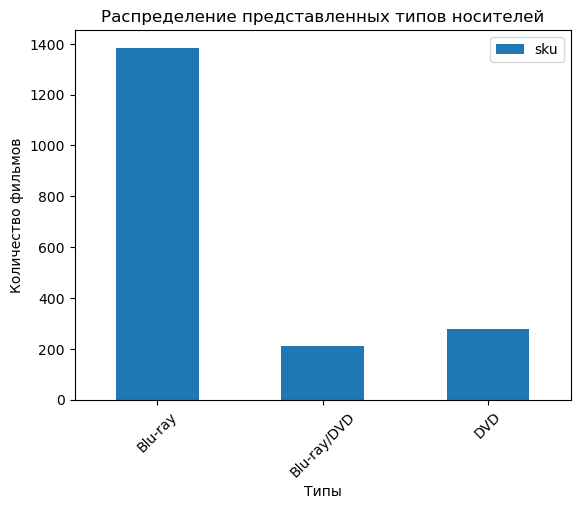

In [16]:
plt.figure(figsize=(10,6))
movie_data.groupby('type').agg({'sku':'nunique'}).plot(kind='bar')
plt.title('Распределение представленных типов носителей')
plt.xlabel('Типы')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

Фильмы, представленные на носителях Blu-ray, составляют около 90% ассортимента.

In [17]:
print('Средняя цена за фильм:')
movie_data.groupby('type').agg({'price':['mean','median']}).round()

Средняя цена за фильм:


price       
             mean median
type                    
Blu-ray      24.0   20.0
Blu-ray/DVD  17.0   15.0
DVD          15.0   14.0

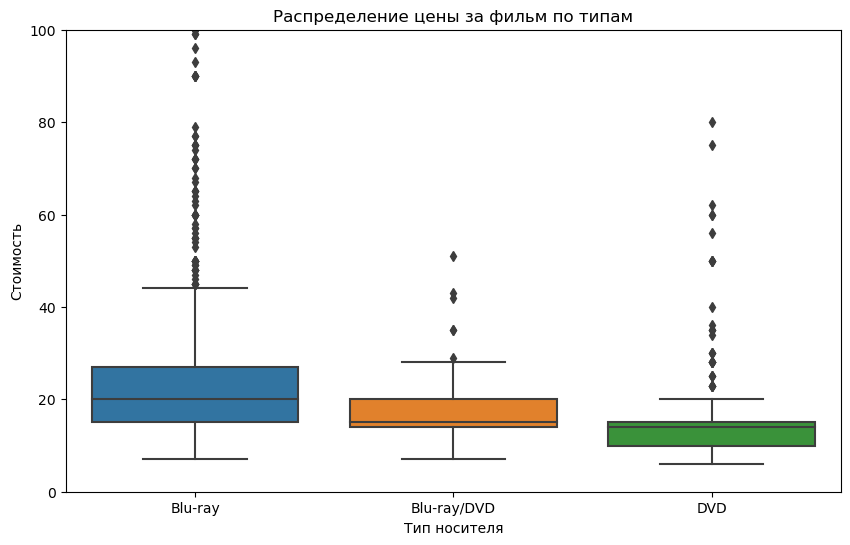

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=movie_data, y='price', x='type')
plt.title('Распределение цены за фильм по типам')
plt.xlabel('Тип носителя')
plt.ylabel('Стоимость')
plt.ylim(0,100)
plt.show()

Фильмы в формате Blu-ray стоят дороже, чем в формате DVD, в реднем на 9 USD.

In [19]:
print('Среднее количество отзывов на фильм:')
movie_data.groupby('type').agg({'customer_review_count':['mean','median']}).round()

Среднее количество отзывов на фильм:


customer_review_count       
                             mean median
type                                    
Blu-ray                     705.0   97.0
Blu-ray/DVD                1276.0  436.0
DVD                         339.0   65.0

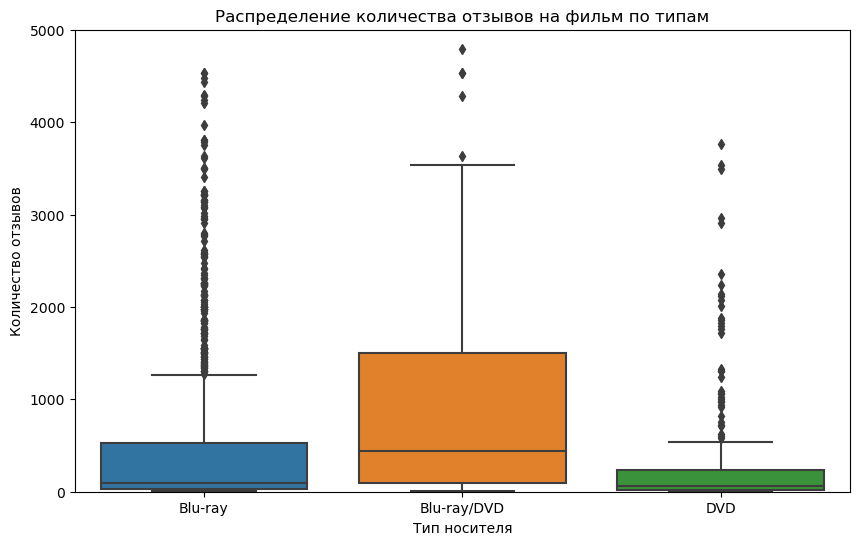

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=movie_data, y='customer_review_count', x='type')
plt.title('Распределение количества отзывов на фильм по типам')
plt.xlabel('Тип носителя')
plt.ylabel('Количество отзывов')
plt.ylim(0,5000)
plt.show()

Больше всего отзывов имеют фильмы, представленные на обоих носителях.

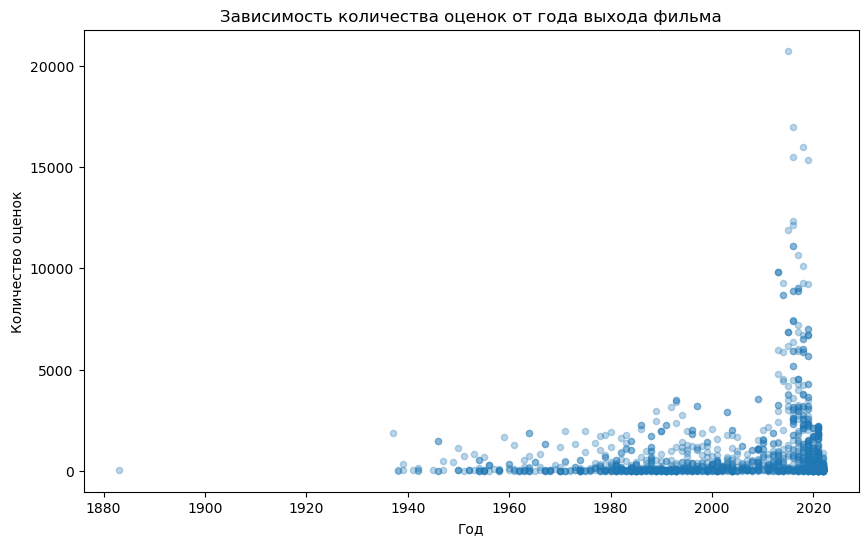

In [21]:
movie_data.plot(x='year', y='customer_review_count', kind='scatter', figsize=(10,6), alpha=.3)
plt.title('Зависимость количества оценок от года выхода фильма')
plt.xlabel('Год')
plt.ylabel('Количество оценок')
plt.show()

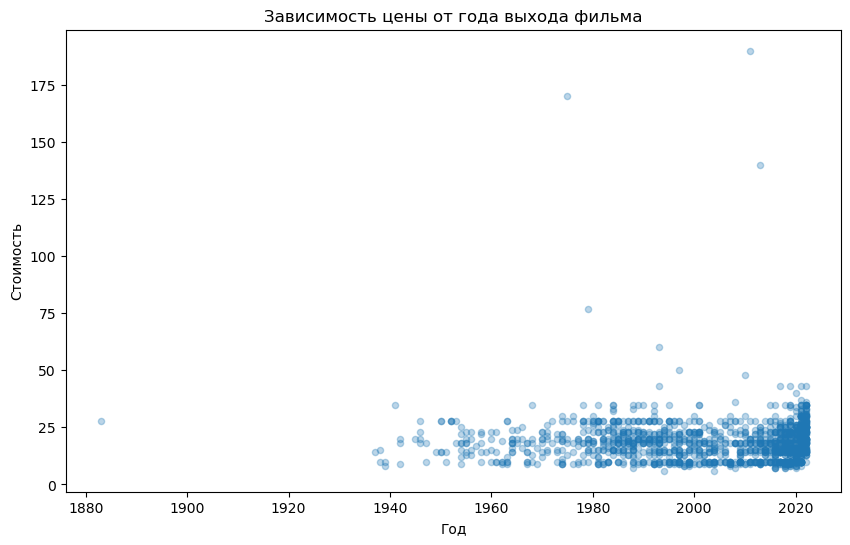

In [22]:
movie_data.plot(x='year', y='price', kind='scatter', figsize=(10,6), alpha=.3)
plt.title('Зависимость цены от года выхода фильма')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

Стоимость фильма слабо коррелирует с датой выхода. Количество оценок, напротив, имеет прямую зависимость, согласно графику, что говорит о большей популярности новых фильмов у покупателей.

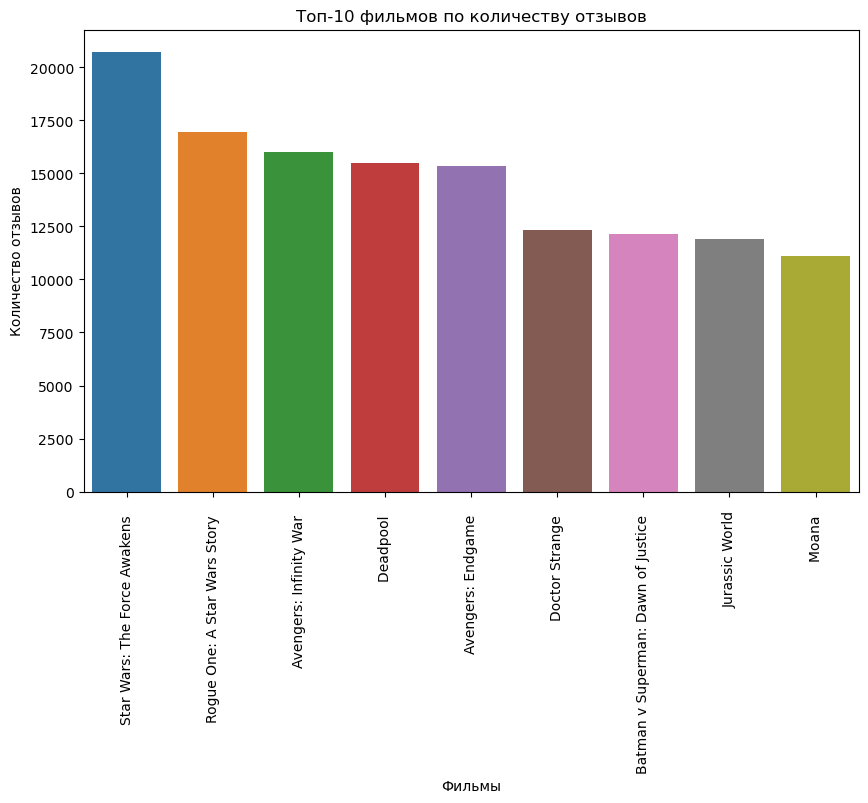

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='name', y='customer_review_count', data=movie_data.sort_values('customer_review_count', ascending=False).head(10)
)
plt.title('Топ-10 фильмов по количеству отзывов')
plt.xlabel('Фильмы')
plt.ylabel('Количество отзывов')
plt.xticks(rotation= 90)
plt.show()

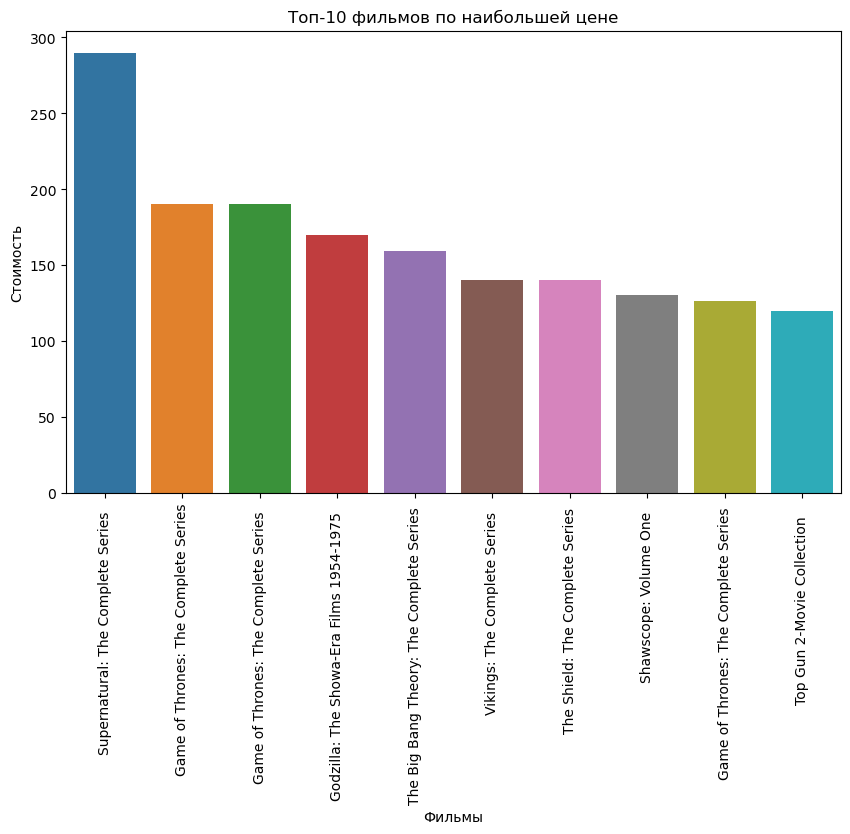

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='name', y='price', data=movie_data.sort_values('price', ascending=False).head(10))
plt.title('Топ-10 фильмов по наибольшей цене')
plt.xlabel('Фильмы')
plt.ylabel('Стоимость')
plt.xticks(rotation= 90)
plt.show()

Наиболее популярные фильмы по количеству отзывов - это франшизы "Star Wars" и о супергероях вселенных Marvel и DC. Самые дорогие фильмы - как правило сериалы, так как имеют бОльшую длительность и могут продаваться на нескольких носителях. 

## Выводы

Полученная выгрузка данных о товарах раздела "Movie" с сайта Best Buy была преобразована в датафрейм для дальнейшего анализа данных.

После преобразования таблицы, были получены данные о количестве отзывов на фильм, цене, sku, названии, типе носителя и годах выпуска.

Выдержка по данным таблицы:
- Года выхода фильмов в продаже - с 1883 по 2022. При этом, наибольшее количество фильмов было выпущено после 2010 года, и они же имеют большее количество рецензий. Фильмы до 1939 года представлены только в формате Blu-ray;
- Большинство фильмов представлены на носителе Blu-ray и составляют около 90% ассортимента, что обусловлено спецификой американского рынка;
- Количество рецензий имеет разброс значений. Больше всего отзывов имеют фильмы, представленные на обоих носителях, вышедшие после 2010 года, и наиболее известные франшизы;
- 75% товаров не превышают цены в 24 USD. Дороже стоят Фильмы в формате Blu-ray (чем в формате DVD, в реднем на 9 USD) и длинные сериалы; 